In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [ ]:
import numpy as np
import sympy as sp

# Parte 1: Interpolación de Lagrange
x = sp.Symbol('x')
f = sp.sin(x)

# Puntos
x_vals = [0, np.pi / 2, np.pi]
y_vals = [sp.sin(val) for val in x_vals]

# Polinomio de Lagrange
def lagrange_basis(j, x_vals):
  """
    Calcula el polinomio base de Lagrange L_j(x) para un conjunto de puntos dados.

    Parámetros:
    j : int
        Índice del polinomio base a calcular.
    x_vals : list of float
        Lista de valores de x que definen los puntos de interpolación.

    Retorna:
    sympy.Expr
        Expresión simbólica de L_j(x).
    """
  x = sp.Symbol('x')
  L = 1
  for m in range(len(x_vals)):
    if m != j:
            L *= (x - x_vals[m]) / (x_vals[j] - x_vals[m])
  return sp.simplify(L)

P_lagrange = sum(y_vals[j] * lagrange_basis(j, x_vals) for j in range(len(x_vals)))
P_lagrange = sp.simplify(P_lagrange)

# Error de Lagrange
f3 = sp.diff(f, x, 3)
error_lagrange = (f3 / sp.factorial(3)) * np.prod([(x - xi) for xi in x_vals])
error_lagrange = sp.simplify(error_lagrange)

In [ ]:
# Evaluación en pi/4
x_eval = np.pi / 4
P_lagrange_eval = P_lagrange.evalf(subs={x: x_eval})
f_exact = sp.sin(x_eval)
lagrange_error_eval = error_lagrange.evalf(subs={x: x_eval})

In [ ]:
# Derivadas en los nodos
f_primes = [np.cos(val) for val in x_vals]

# Error de Hermite
f6 = sp.diff(f, x, 6)
error_hermite = (f6 / sp.factorial(6)) * np.prod([(x - xi)**2 for xi in x_vals])
error_hermite = sp.simplify(error_hermite)

# Evaluación del error de Hermite
hermite_error_eval = error_hermite.evalf(subs={x: x_eval})

In [ ]:
print("Polinomio de Lagrange:", P_lagrange)
print("P(pi/4) =", P_lagrange_eval)
print("f(pi/4) =", f_exact)
print("Error de Lagrange en pi/4:", lagrange_error_eval)
print("Expresión error de Hermite:", error_hermite)
print("Error de Hermite en pi/4:", hermite_error_eval)

Polinomio de Lagrange: x*(1.27323954473516 - 0.405284734569351*x)
P(pi/4) = 0.750000000000000
f(pi/4) = 0.707106781186547
Error de Lagrange en pi/4: -0.171287097656143
Expresión error de Hermite: -0.0338226010534731*x**2*(0.318309886183791*x - 1)**2*(0.636619772367581*x - 1)**2*sin(x)
Error de Hermite en pi/4: -0.00207459966472340


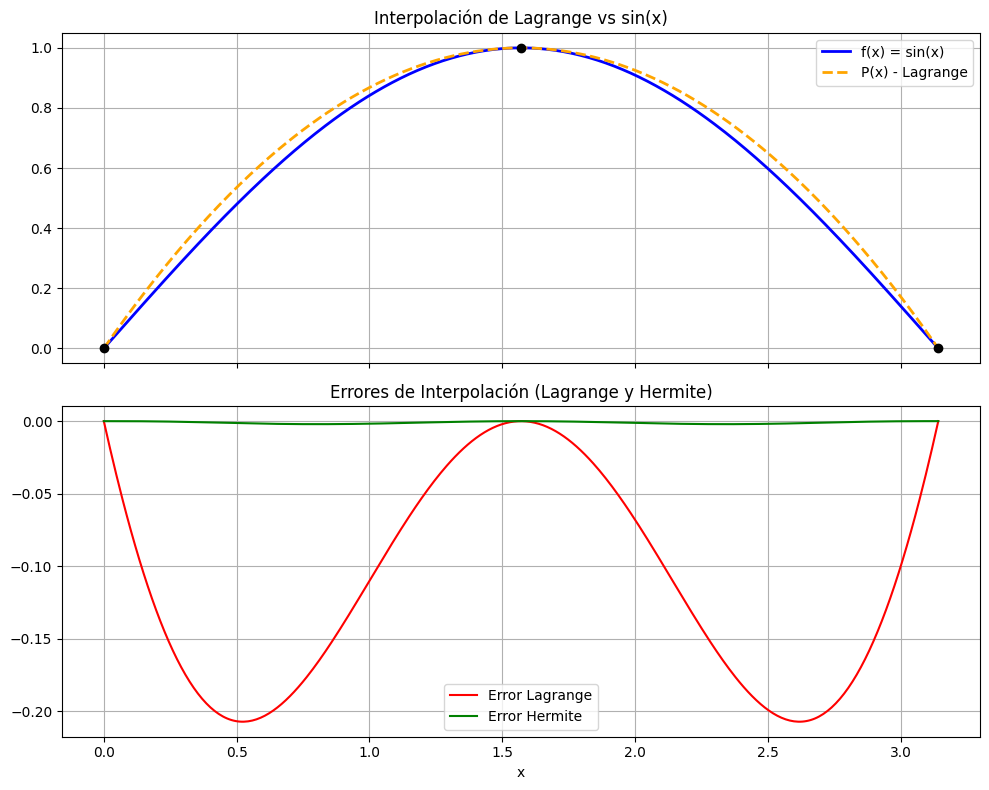

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Variable simbólica
x = sp.Symbol('x')
f = sp.sin(x)

# Puntos de interpolación
x_vals = [0, np.pi / 2, np.pi]
y_vals = [sp.sin(val) for val in x_vals]

# Función base de Lagrange
def lagrange_basis(j, x_vals):
  """
    Calcula el polinomio base de Lagrange L_j(x) para un conjunto de puntos dados.

    Parámetros:
    j : int
        Índice del polinomio base a calcular.
    x_vals : list of float
        Lista de valores de x que definen los puntos de interpolación.

    Retorna:
    sympy.Expr
        Expresión simbólica de L_j(x).
    """
  x = sp.Symbol('x')
  L = 1
  for m in range(len(x_vals)):
    if m != j:
      L *= (x - x_vals[m]) / (x_vals[j] - x_vals[m])
  return sp.simplify(L)

# Polinomio de Lagrange
P_lagrange = sum(y_vals[j] * lagrange_basis(j, x_vals) for j in range(len(x_vals)))
P_lagrange = sp.simplify(P_lagrange)

# Error teórico de Lagrange
f3 = sp.diff(f, x, 3)
error_lagrange = (f3 / sp.factorial(3)) * np.prod([(x - xi) for xi in x_vals])
error_lagrange = sp.simplify(error_lagrange)

# Error teórico de Hermite
f6 = sp.diff(f, x, 6)
error_hermite = (f6 / sp.factorial(6)) * np.prod([(x - xi)**2 for xi in x_vals])
error_hermite = sp.simplify(error_hermite)

# Funciones numéricas
P_lagrange_func = sp.lambdify(x, P_lagrange, modules=['numpy'])
f_func = np.sin
lagrange_error_func = sp.lambdify(x, error_lagrange, modules=['numpy'])
hermite_error_func = sp.lambdify(x, error_hermite, modules=['numpy'])

# Puntos para graficar
x_plot = np.linspace(0, np.pi, 400)
f_plot = f_func(x_plot)
P_plot = P_lagrange_func(x_plot)
lagrange_error_plot = lagrange_error_func(x_plot)
hermite_error_plot = hermite_error_func(x_plot)

# Crear gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Gráfica función vs interpolación
axs[0].plot(x_plot, f_plot, label='f(x) = sin(x)', color='blue', linewidth=2)
axs[0].plot(x_plot, P_plot, label='P(x) - Lagrange', linestyle='--', color='orange', linewidth=2)
axs[0].scatter(x_vals, [float(y) for y in y_vals], color='black', zorder=5)
axs[0].set_title("Interpolación de Lagrange vs sin(x)")
axs[0].legend()
axs[0].grid(True)

# Gráfica de errores
axs[1].plot(x_plot, lagrange_error_plot, label='Error Lagrange', color='red')
axs[1].plot(x_plot, hermite_error_plot, label='Error Hermite', color='green')
axs[1].set_title("Errores de Interpolación (Lagrange y Hermite)")
axs[1].legend()
axs[1].grid(True)

plt.xlabel("x")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import sympy as sp

# Variable simbólica y función objetivo
x = sp.Symbol('x')
f = sp.sin(x)
fp = sp.diff(f, x)  # Derivada de f(x)

# Puntos conocidos (nodos de interpolación)
x_vals = [0, np.pi / 2, np.pi]
y_vals = [sp.sin(xi) for xi in x_vals]  # Valores de f(x) en los nodos
dy_vals = [sp.cos(xi) for xi in x_vals]  # Valores de f'(x) en los nodos

def H0(i, x_vals):
    """
    Calcula la base de Hermite H0 para el i-ésimo nodo.

    Parámetros:
    ----------
    i : int
        Índice del nodo actual.
    x_vals : list of float
        Lista de coordenadas de los nodos de interpolación.

    Retorna:
    -------
    sympy.Expr
        Expresión simbólica de H0_i(x).
    """
    xi = x_vals[i]
    # L_i(x): base de Lagrange
    Li = 1
    for j in range(len(x_vals)):
        if j != i:
            Li *= (x - x_vals[j]) / (xi - x_vals[j])
    Li = sp.simplify(Li)

    # Derivada de L_i evaluada en x = xi
    dLi_xi = sp.diff(Li, x).subs(x, xi)

    # H0_i(x) = (1 - 2*dLi_xi*(x - xi)) * (L_i(x))^2
    return sp.simplify((1 - 2 * dLi_xi * (x - xi)) * Li**2)

def H1(i, x_vals):
    """
    Calcula la base de Hermite H1 para el i-ésimo nodo.

    Parámetros:
    ----------
    i : int
        Índice del nodo actual.
    x_vals : list of float
        Lista de coordenadas de los nodos de interpolación.

    Retorna:
    -------
    sympy.Expr
        Expresión simbólica de H1_i(x).
    """
    xi = x_vals[i]
    # L_i(x): base de Lagrange
    Li = 1
    for j in range(len(x_vals)):
        if j != i:
            Li *= (x - x_vals[j]) / (xi - x_vals[j])
    Li = sp.simplify(Li)

    # H1_i(x) = (x - xi)*(L_i(x))^2
    return sp.simplify((x - xi) * Li**2)

# Construcción del polinomio de Hermite
P_hermite = 0
for i in range(len(x_vals)):
    H_0 = H0(i, x_vals)
    H_1 = H1(i, x_vals)
    P_hermite += y_vals[i] * H_0 + dy_vals[i] * H_1

# Simplificar el resultado final
P_hermite = sp.simplify(P_hermite)

# Mostrar el polinomio de Hermite resultante
print("Polinomio de Hermite simplificado:")
sp.pprint(P_hermite)

Polinomio de Hermite simplificado:
  ⎛                        4                       3                      2    ↪
x⋅⎝- 2.66556118209779e-18⋅x  + 0.0352495783421515⋅x  - 0.221479632723681⋅x  +  ↪

↪                           ⎞
↪ 0.0295895073584512⋅x + 1.0⎠


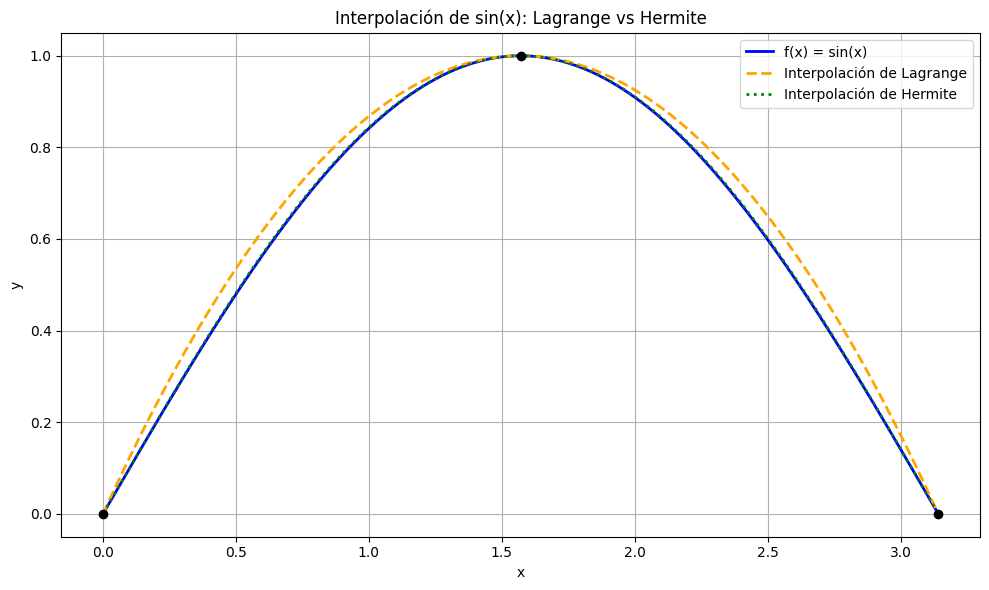

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Variable simbólica
x = sp.Symbol('x')
f = sp.sin(x)
fp = sp.diff(f, x)

# Puntos conocidos
x_vals = [0, np.pi / 2, np.pi]
y_vals = [sp.sin(xi) for xi in x_vals]
dy_vals = [sp.cos(xi) for xi in x_vals]

# Funciones base de Hermite
def H0(i, x_vals):
    """
    Calcula la base H0 de Hermite para el i-ésimo nodo.

    Parámetros:
    ----------
    i : int
        Índice del nodo actual.
    x_vals : list of float
        Lista de nodos.

    Retorna:
    -------
    sympy.Expr
        Expresión simbólica de H0_i(x).
    """
    xi = x_vals[i]
    Li = 1
    for j in range(len(x_vals)):
        if j != i:
            Li *= (x - x_vals[j]) / (xi - x_vals[j])
    Li = sp.simplify(Li)
    return (1 - 2 * sp.diff(Li, x).subs(x, xi) * (x - xi)) * Li**2

def H1(i, x_vals):
    """
    Calcula la base H1 de Hermite para el i-ésimo nodo.

    Parámetros:
    ----------
    i : int
        Índice del nodo actual.
    x_vals : list of float
        Lista de nodos.

    Retorna:
    -------
    sympy.Expr
        Expresión simbólica de H1_i(x).
    """
    xi = x_vals[i]
    Li = 1
    for j in range(len(x_vals)):
        if j != i:
            Li *= (x - x_vals[j]) / (xi - x_vals[j])
    Li = sp.simplify(Li)
    return (x - xi) * Li**2

# Función base de Lagrange
def lagrange_basis(j, x_vals):
    """
    Calcula la base de Lagrange para el j-ésimo nodo.

    Parámetros:
    ----------
    j : int
        Índice del nodo actual.
    x_vals : list of float
        Lista de nodos.

    Retorna:
    -------
    sympy.Expr
        Expresión simbólica de L_j(x).
    """
    Lj = 1
    for m in range(len(x_vals)):
        if m != j:
            Lj *= (x - x_vals[m]) / (x_vals[j] - x_vals[m])
    return sp.simplify(Lj)

# Construcción del polinomio de Hermite
P_hermite = 0
for i in range(len(x_vals)):
    H0_i = H0(i, x_vals)
    H1_i = H1(i, x_vals)
    P_hermite += y_vals[i] * H0_i + dy_vals[i] * H1_i
P_hermite = sp.simplify(P_hermite)

# Construcción del polinomio de Lagrange
P_lagrange = 0
for j in range(len(x_vals)):
    L_j = lagrange_basis(j, x_vals)
    P_lagrange += y_vals[j] * L_j
P_lagrange = sp.simplify(P_lagrange)

# Conversión a funciones numéricas
f_func = np.sin
P_hermite_func = sp.lambdify(x, P_hermite, modules=['numpy'])
P_lagrange_func = sp.lambdify(x, P_lagrange, modules=['numpy'])

# Evaluación para graficar
x_plot = np.linspace(0, np.pi, 400)
f_plot = f_func(x_plot)
P_h_plot = P_hermite_func(x_plot)
P_l_plot = P_lagrange_func(x_plot)

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label='f(x) = sin(x)', linewidth=2, color='blue')
plt.plot(x_plot, P_l_plot, '--', label='Interpolación de Lagrange', linewidth=2, color='orange')
plt.plot(x_plot, P_h_plot, ':', label='Interpolación de Hermite', linewidth=2, color='green')
plt.scatter(x_vals, [float(y) for y in y_vals], color='black', zorder=5)
plt.title("Interpolación de sin(x): Lagrange vs Hermite")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

Error máximo Lagrange: 36.6881
Error máximo Newton: 36.6881


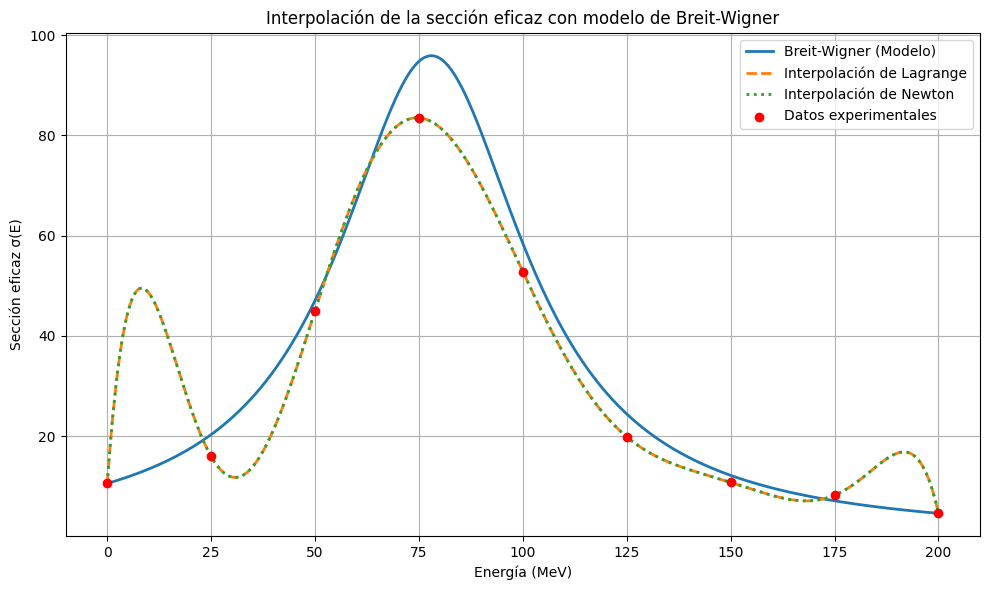

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Datos experimentales
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Parámetros del modelo de Breit-Wigner
Er = 78      # Energía de resonancia (MeV)
Gamma = 55   # Ancho de resonancia (MeV)

# Cálculo de sigma0 (ajuste de la fórmula Breit-Wigner)
E0 = Energia[0]
sigma0 = sigma_exp[0] * ((E0 - Er)**2 + (Gamma**2) / 4)

def breit_wigner(E, sigma0, Er, Gamma):
    """
    Calcula la sección eficaz sigma(E) usando la fórmula de Breit-Wigner.

    Parámetros:
    ----------
    E : float o array
        Energía en MeV.
    sigma0 : float
        Factor de normalización.
    Er : float
        Energía de resonancia.
    Gamma : float
        Ancho de resonancia.

    Retorna:
    -------
    float o array
        Valor de sigma(E).
    """
    return sigma0 / ((E - Er)**2 + (Gamma**2) / 4)

# Interpolación de Lagrange (usando scipy)
poly_lagrange = lagrange(Energia, sigma_exp)

# Interpolación de Newton (diferencias divididas)
def divided_diff(x, y):
    """
    Calcula el polinomio de diferencias divididas de Newton.

    Parámetros:
    ----------
    x : array
        Abscisas (nodos).
    y : array
        Valores en los nodos.

    Retorna:
    -------
    array
        Coeficientes del polinomio de Newton.
    """
    n = len(y)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_poly(coef, x_data, x):
    """
    Evalúa el polinomio de Newton en el punto o puntos dados.

    Parámetros:
    ----------
    coef : array
        Coeficientes calculados por divided_diff.
    x_data : array
        Abscisas (nodos) usados para la interpolación.
    x : float o array
        Puntos donde evaluar el polinomio.

    Retorna:
    -------
    float o array
        Valor del polinomio en x.
    """
    n = len(coef)
    result = coef[-1]
    for k in range(n-2, -1, -1):
        result = result * (x - x_data[k]) + coef[k]
    return result

# Coeficientes de Newton
coef_newton = divided_diff(Energia, sigma_exp)

# Evaluación para graficar
E_fine = np.linspace(0, 200, 1000)
sigma_true = breit_wigner(E_fine, sigma0, Er, Gamma)
sigma_lagrange = poly_lagrange(E_fine)
sigma_newton = newton_poly(coef_newton, Energia, E_fine)

# Cálculo de errores
error_lagrange = np.max(np.abs(sigma_true - sigma_lagrange))
error_newton = np.max(np.abs(sigma_true - sigma_newton))

print(f"Error máximo Lagrange: {error_lagrange:.4f}")
print(f"Error máximo Newton: {error_newton:.4f}")

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(E_fine, sigma_true, label='Breit-Wigner (Modelo)', linewidth=2)
plt.plot(E_fine, sigma_lagrange, '--', label='Interpolación de Lagrange', linewidth=2)
plt.plot(E_fine, sigma_newton, ':', label='Interpolación de Newton', linewidth=2)
plt.scatter(Energia, sigma_exp, color='red', label='Datos experimentales', zorder=5)
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz σ(E)')
plt.title('Interpolación de la sección eficaz con modelo de Breit-Wigner')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Error máximo Lagrange: 36.6881
Error máximo Newton: 36.6881
Error máximo Hermite: 177.9890


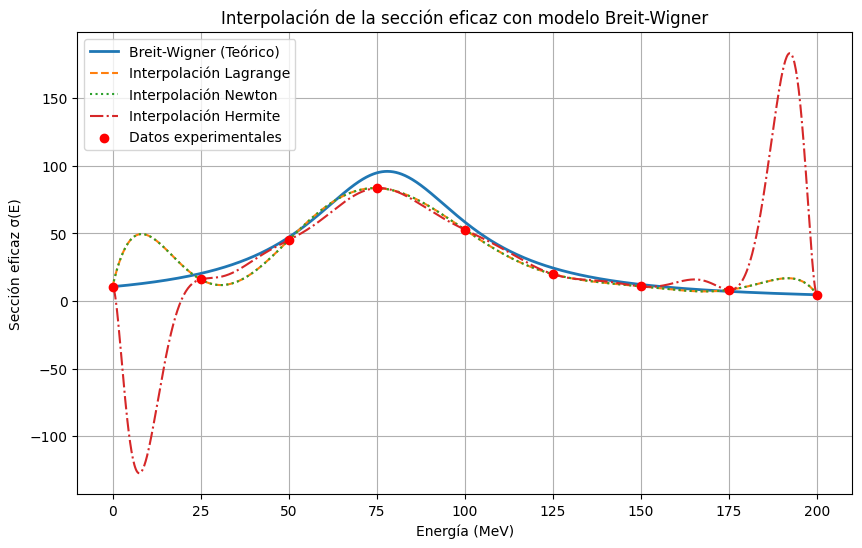

In [ ]:
# INTERPOLACIÓN Y COMPARACIÓN DE SECCIÓN EFICAZ EXPERIMENTAL
# Usando modelos: Breit-Wigner (teórico), Lagrange, Newton, Hermite

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# DATOS EXPERIMENTALES Y PARÁMETROS DE AJUSTE
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

Er, Gamma = 78, 55  # Parámetros de la distribución Breit-Wigner

# CÁLCULO DE LA SECCIÓN EFICAZ TEÓRICA (Breit-Wigner)
E0 = Energia[0]
sigma0 = sigma_exp[0] * ((E0 - Er)**2 + (Gamma**2)/4)

def breit_wigner(E, sigma0, Er, Gamma):
    """
    Calcula la sección eficaz teórica según la fórmula de Breit-Wigner.

    Parámetros:
    - E: Energía (o array de energías).
    - sigma0: Factor de normalización.
    - Er: Energía de resonancia.
    - Gamma: Ancho de la resonancia.

    Retorna:
    - Sección eficaz σ(E) evaluada en los puntos E.
    """
    return sigma0 / ((E - Er)**2 + (Gamma**2)/4)

# DERIVADAS NUMÉRICAS (para Hermite)
def derivadas_finitas(x, y):
    """
    Calcula la derivada numérica de y respecto a x usando diferencias finitas.

    Parámetros:
    - x: Array de valores de x.
    - y: Array de valores de y.

    Retorna:
    - Array de derivadas dy/dx en cada punto de x.
    """
    n = len(x)
    dy = np.zeros(n)
    dy[0] = (y[1] - y[0]) / (x[1] - x[0])          # adelante
    dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])      # atrás
    for i in range(1, n-1):                         # centradas
        dy[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return dy

dy = derivadas_finitas(Energia, sigma_exp)

# INTERPOLACIÓN DE HERMITE
def hermite_interpolation(x_data, y_data, dy_data, x):
    """
    Interpolación de Hermite para datos con derivadas conocidas.

    Parámetros:
    - x_data: Array de puntos conocidos.
    - y_data: Valores de la función en los puntos conocidos.
    - dy_data: Derivadas de la función en los puntos conocidos.
    - x: Array de puntos donde evaluar la interpolación.

    Retorna:
    - Valores interpolados en los puntos x.
    """
    n = len(x_data)
    H = np.zeros_like(x, dtype=float)

    for k in range(n):
        # Polinomio base L_k(x)
        Lk = np.ones_like(x, dtype=float)
        for j in range(n):
            if j != k:
                Lk *= (x - x_data[j]) / (x_data[k] - x_data[j])

        # Derivada de L_k en x_data[k]
        Lk_prime = 0
        for j in range(n):
            if j != k:
                prod = 1
                for m in range(n):
                    if m != k and m != j:
                        prod *= (x_data[k] - x_data[m]) / (x_data[k] - x_data[m])
                Lk_prime += prod / (x_data[k] - x_data[j])

        # Suma del polinomio de Hermite
        H += (1 - 2*(x - x_data[k]) * Lk_prime) * Lk**2 * y_data[k] + (x - x_data[k]) * Lk**2 * dy_data[k]

    return H

# INTERPOLACIÓN DE NEWTON
def divided_diff(x, y):
    """
    Calcula los coeficientes de las diferencias divididas para el método de Newton.

    Parámetros:
    - x: Array de puntos conocidos.
    - y: Array de valores conocidos.

    Retorna:
    - Array de coeficientes de diferencias divididas.
    """
    n = len(y)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_poly(coef, x_data, x):
    """
    Evalúa el polinomio interpolante de Newton en los puntos x.

    Parámetros:
    - coef: Coeficientes de diferencias divididas.
    - x_data: Array de puntos conocidos.
    - x: Array de puntos donde evaluar.

    Retorna:
    - Valores interpolados en los puntos x.
    """
    n = len(coef)
    result = coef[-1]
    for k in range(n-2, -1, -1):
        result = result * (x - x_data[k]) + coef[k]
    return result

# EVALUACIÓN DE INTERPOLACIONES
E_fine = np.linspace(0, 200, 1000)
sigma_true = breit_wigner(E_fine, sigma0, Er, Gamma)

# Lagrange
poly_lagrange = lagrange(Energia, sigma_exp)
sigma_lagrange = poly_lagrange(E_fine)

# Newton
coef_newton = divided_diff(Energia, sigma_exp)
sigma_newton = newton_poly(coef_newton, Energia, E_fine)

# Hermite
sigma_hermite = hermite_interpolation(Energia, sigma_exp, dy, E_fine)

# CÁLCULO DE ERRORES MÁXIMOS
error_lagrange = np.max(np.abs(sigma_true - sigma_lagrange))
error_newton = np.max(np.abs(sigma_true - sigma_newton))
error_hermite = np.max(np.abs(sigma_true - sigma_hermite))

print(f"Error máximo Lagrange: {error_lagrange:.4f}")
print(f"Error máximo Newton: {error_newton:.4f}")
print(f"Error máximo Hermite: {error_hermite:.4f}")

# GRÁFICA DE RESULTADOS
plt.figure(figsize=(10,6))
plt.plot(E_fine, sigma_true, label='Breit-Wigner (Teórico)', linewidth=2)
plt.plot(E_fine, sigma_lagrange, '--', label='Interpolación Lagrange')
plt.plot(E_fine, sigma_newton, ':', label='Interpolación Newton')
plt.plot(E_fine, sigma_hermite, '-.', label='Interpolación Hermite')
plt.scatter(Energia, sigma_exp, c='red', label='Datos experimentales', zorder=5)
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz σ(E)')
plt.title('Interpolación de la sección eficaz con modelo Breit-Wigner')
plt.legend()
plt.grid(True)
plt.show()

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

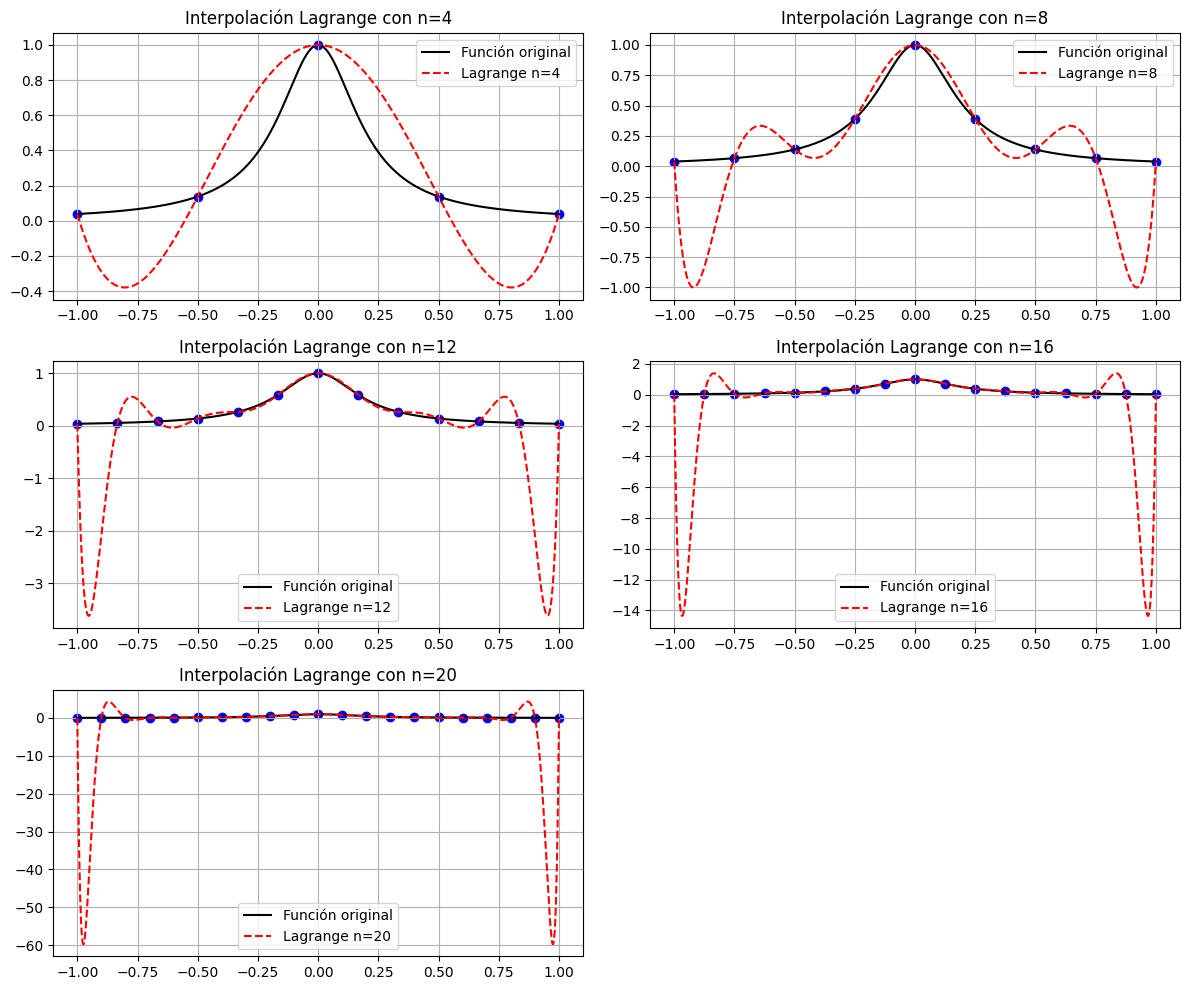

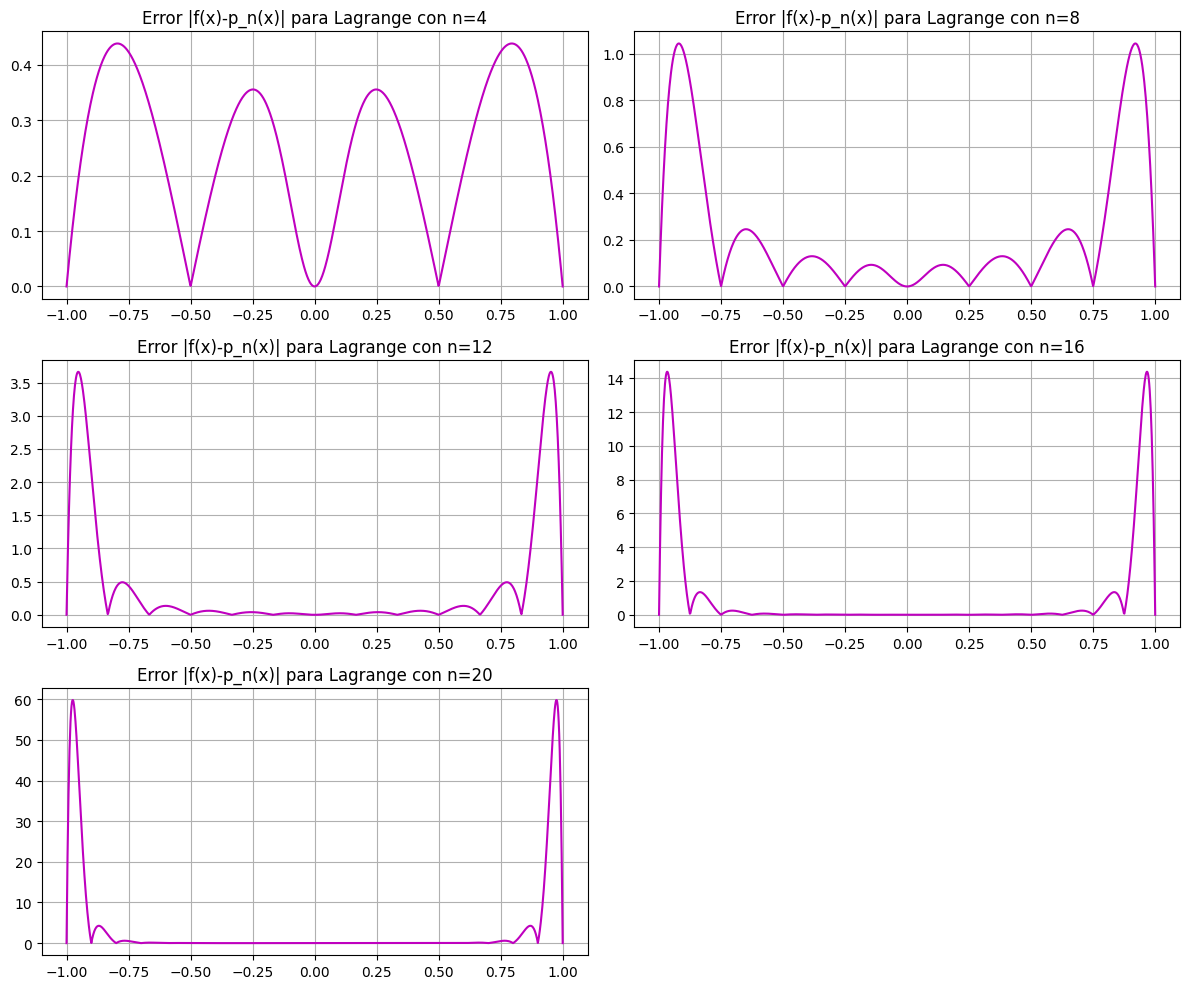

Cota máxima estimada del error para n=4 en x=0.5: 0.00000e+00


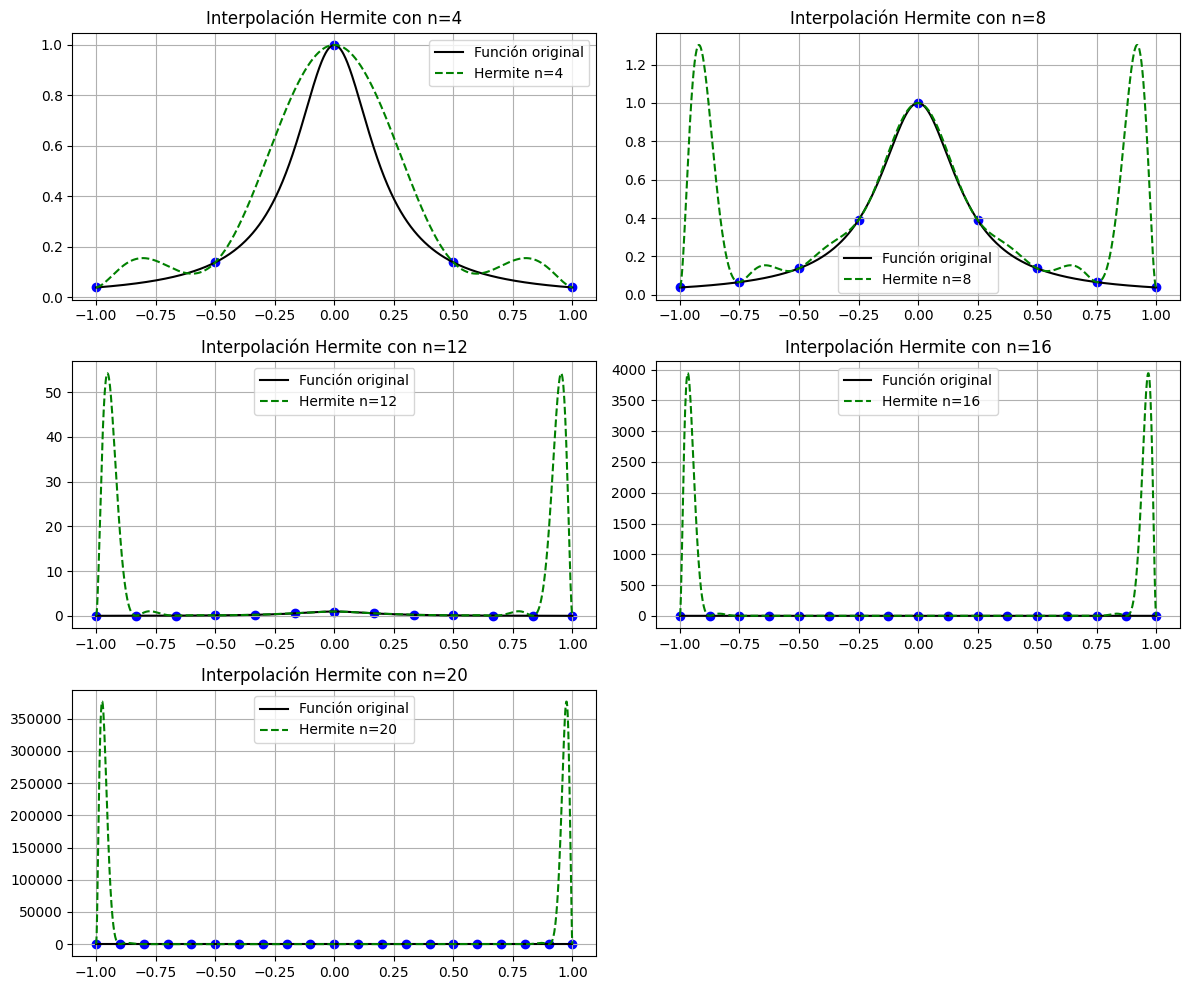

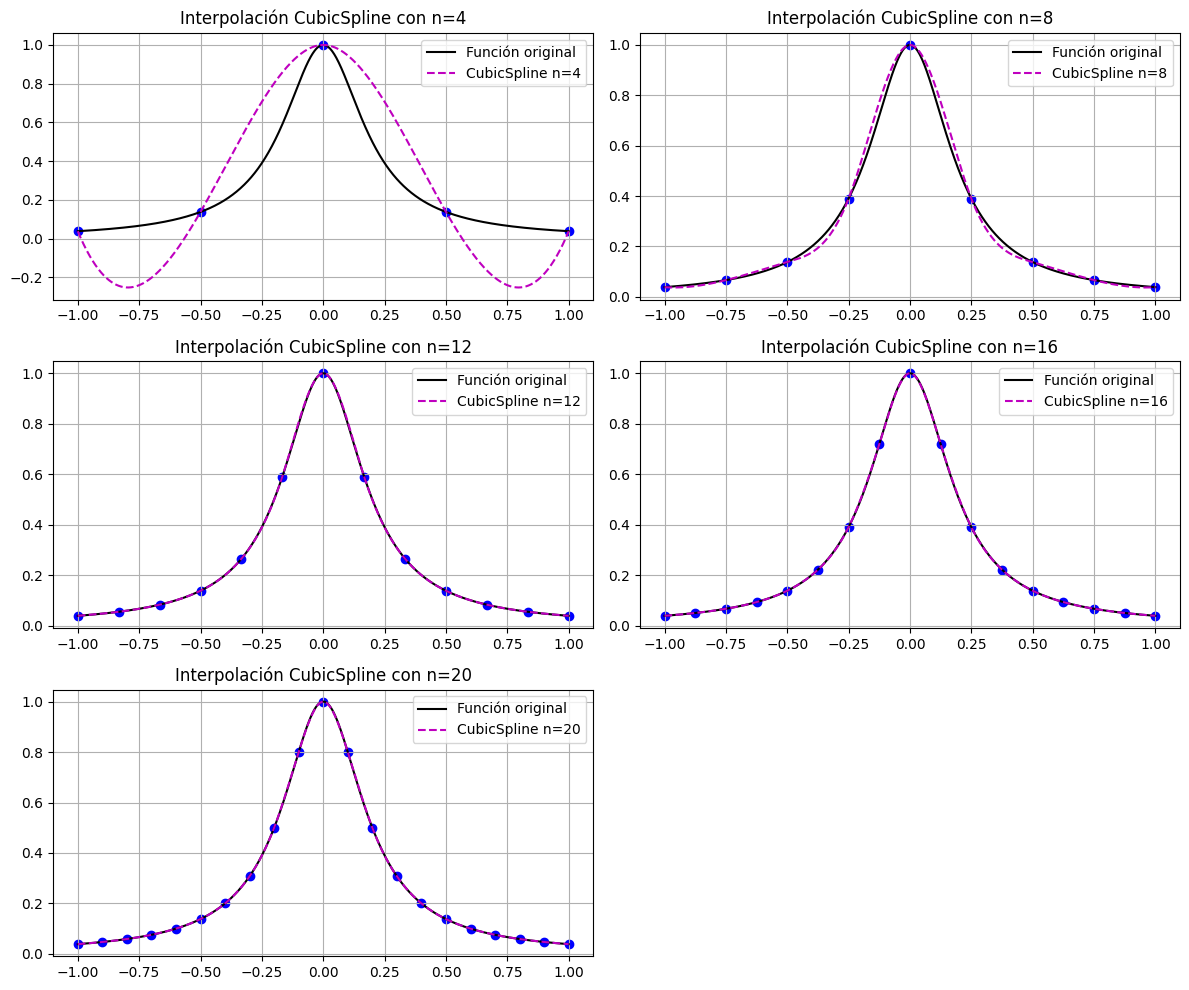

In [ ]:
"""
Este código implementa y compara diferentes métodos de interpolación
(Lagrange, Hermite y CubicSpline) para la función de Runge f(x) = 1 / (1 + 25x²).
Se calcula también la cota de error de interpolación para n=4 y se grafican
los resultados y errores de las aproximaciones.

Contenido del script:
1) Definición de la función f(x) y de los nodos de interpolación.
2) Cálculo de la interpolación de Lagrange para distintos valores de n.
3) Gráficas de la función original y de las aproximaciones de Lagrange.
4) Cálculo y graficación de los errores absolutos de Lagrange.
5) Estimación de la cota del error máximo para n=4 en x=0.5 usando derivadas simbólicas.
6) Implementación de la interpolación de Hermite usando derivadas finitas y polinomios de Hermite.
7) Graficación de la función original y de las aproximaciones de Hermite.
8) Interpolación y graficación usando CubicSpline.
"""

import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
import sympy as sp

# Función original
def f(x):
    """Función de Runge: f(x) = 1 / (1 + 25x²)."""
    return 1 / (1 + 25 * x**2)

# Puntos finos para evaluar
x_fine = np.linspace(-1, 1, 1000)
y_true = f(x_fine)

# Valores de n a probar
n_values = [4, 8, 12, 16, 20]

# 1 y 2: Polinomio de Lagrange e interpolación
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    poly_lagr = lagrange(x_nodes, y_nodes)
    y_interp = poly_lagr(x_fine)

    plt.subplot(3, 2, i)
    plt.plot(x_fine, y_true, 'k-', label='Función original')
    plt.plot(x_fine, y_interp, 'r--', label=f'Lagrange n={n}')
    plt.scatter(x_nodes, y_nodes, c='blue')
    plt.title(f'Interpolación Lagrange con n={n}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# 3: Graficar error para cada n
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    poly_lagr = lagrange(x_nodes, y_nodes)
    y_interp = poly_lagr(x_fine)
    error = np.abs(y_true - y_interp)

    plt.subplot(3, 2, i)
    plt.plot(x_fine, error, 'm')
    plt.title(f'Error |f(x)-p_n(x)| para Lagrange con n={n}')
    plt.grid(True)
plt.tight_layout()
plt.show()

# 4: Estimación de la cota de error con sympy para n=4, en x=0.5
x = sp.symbols('x')
n = 4
x_nodes = np.linspace(-1, 1, n+1)
f_sym = 1/(1 + 25*x**2)

# Derivada de orden n+1
f_deriv = f_sym.diff(x, n+1)

# Para estimar la cota tomamos el máximo valor absoluto de la derivada en [-1,1]
f_deriv_func = sp.lambdify(x, f_deriv, 'numpy')
x_test = np.linspace(-1, 1, 1000)
max_deriv = np.max(np.abs(f_deriv_func(x_test)))

# Producto (x - x_0)(x - x_1)...(x - x_n) en x=0.5
prod_term = np.prod([0.5 - xi for xi in x_nodes])

error_bound = (1 / factorial(n+1)) * max_deriv * np.abs(prod_term)
print(f"Cota máxima estimada del error para n={n} en x=0.5: {error_bound:.5e}")

# 5: Interpolación de Hermite con diferencias finitas
def derivadas_finitas(x, y):
    """
    Calcula las derivadas aproximadas en los nodos usando diferencias finitas centradas
    para nodos interiores y progresivas/regresivas en los extremos.
    Parámetros:
        x: arreglo con nodos de interpolación.
        y: arreglo con valores de la función en los nodos.
    Devuelve:
        dy: arreglo con las derivadas aproximadas en los nodos.

    """
    n = len(x)
    dy = np.zeros(n)
    dy[0] = (y[1] - y[0]) / (x[1] - x[0])
    dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
    for i in range(1, n-1):
        dy[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return dy

def hermite_interpolation(x_data, y_data, dy_data, x_eval):
    """
    Interpolación de Hermite utilizando la fórmula de Hermite.
    Parámetros:
        x_data: nodos de interpolación.
        y_data: valores de la función en los nodos.
        dy_data: derivadas en los nodos.
        x_eval: puntos de evaluación.
    Devuelve:
        H: valores de la interpolación en x_eval.
    """
    n = len(x_data)
    H = np.zeros_like(x_eval, dtype=float)

    for k in range(n):
        Lk = np.ones_like(x_eval, dtype=float)
        for j in range(n):
            if j != k:
                Lk *= (x_eval - x_data[j]) / (x_data[k] - x_data[j])

        Lk_prime = 0
        for j in range(n):
            if j != k:
                prod = 1
                for m in range(n):
                    if m != k and m != j:
                        prod *= (x_data[k] - x_data[m]) / (x_data[k] - x_data[m])
                Lk_prime += prod / (x_data[k] - x_data[j])

        H += (1 - 2*(x_eval - x_data[k])*Lk_prime)*Lk**2*y_data[k] + (x_eval - x_data[k])*Lk**2*dy_data[k]
    return H

# Graficar interpolación de Hermite
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    dy_nodes = derivadas_finitas(x_nodes, y_nodes)
    y_hermite = hermite_interpolation(x_nodes, y_nodes, dy_nodes, x_fine)

    plt.subplot(3, 2, i)
    plt.plot(x_fine, y_true, 'k-', label='Función original')
    plt.plot(x_fine, y_hermite, 'g--', label=f'Hermite n={n}')
    plt.scatter(x_nodes, y_nodes, c='blue')
    plt.title(f'Interpolación Hermite con n={n}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# 6: Interpolación CubicSpline
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    cs = CubicSpline(x_nodes, y_nodes)
    y_cs = cs(x_fine)

    plt.subplot(3, 2, i)
    plt.plot(x_fine, y_true, 'k-', label='Función original')
    plt.plot(x_fine, y_cs, 'm--', label=f'CubicSpline n={n}')
    plt.scatter(x_nodes, y_nodes, c='blue')
    plt.title(f'Interpolación CubicSpline con n={n}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusiones:**

•	La interpolación de Lagrange muestra oscilaciones crecientes para $n$ grande (fenómeno de Runge).

•	La interpolación de Hermite mejora la aproximación al usar derivadas, suavizando un poco el comportamiento, pero no elimina por completo las oscilaciones.

•	La interpolación con CubicSpline es mucho más estable y suave para valores grandes de $n$, evitando oscilaciones fuertes.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

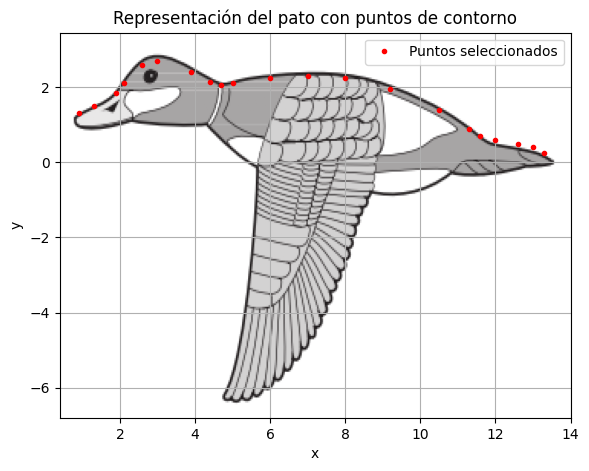

In [ ]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange, CubicSpline
from sympy import symbols, diff, lambdify, factorial

# Descargar y mostrar la imagen
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png'
urllib.request.urlretrieve(pato, 'pato.jpg')
imagen_pato = plt.imread('pato.jpg')

# Datos de puntos
xp = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

# Mostrar imagen con puntos
plt.figure(figsize=(10,5))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos seleccionados')
plt.title('Representación del pato con puntos de contorno')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

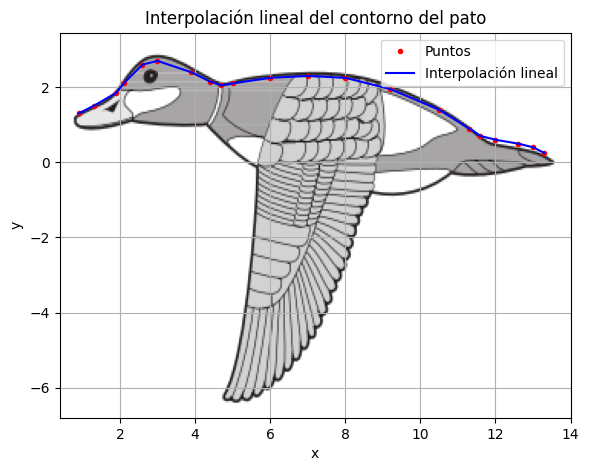

In [ ]:
from scipy.interpolate import interp1d

f_linear = interp1d(xp, yp, kind='linear')
x_lineal = np.linspace(min(xp), max(xp), 500)
y_lineal = f_linear(x_lineal)

plt.figure(figsize=(10,5))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos')
plt.plot(x_lineal, y_lineal, 'b-', label='Interpolación lineal')
plt.title('Interpolación lineal del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

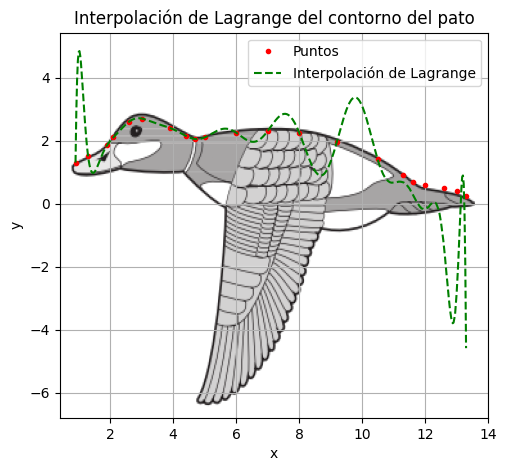

In [ ]:
lagrange_poly = lagrange(xp, yp)
x_lagrange = np.linspace(min(xp), max(xp), 500)
y_lagrange = lagrange_poly(x_lagrange)

plt.figure(figsize=(10,5))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos')
plt.plot(x_lagrange, y_lagrange, 'g--', label='Interpolación de Lagrange')
plt.title('Interpolación de Lagrange del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

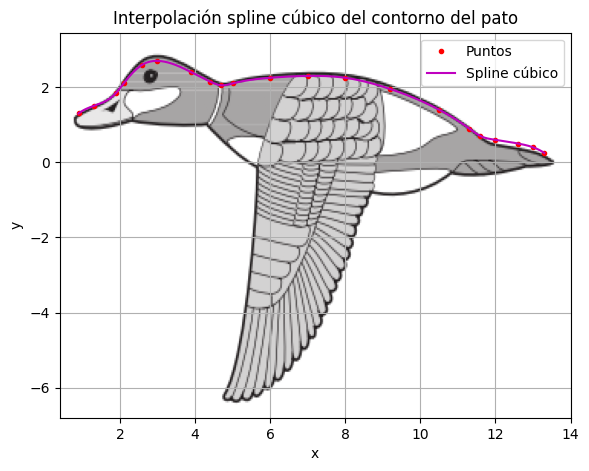

In [ ]:
cs = CubicSpline(xp, yp)
x_spline = np.linspace(min(xp), max(xp), 500)
y_spline = cs(x_spline)

plt.figure(figsize=(10,5))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos')
plt.plot(x_spline, y_spline, 'm-', label='Spline cúbico')
plt.title('Interpolación spline cúbico del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

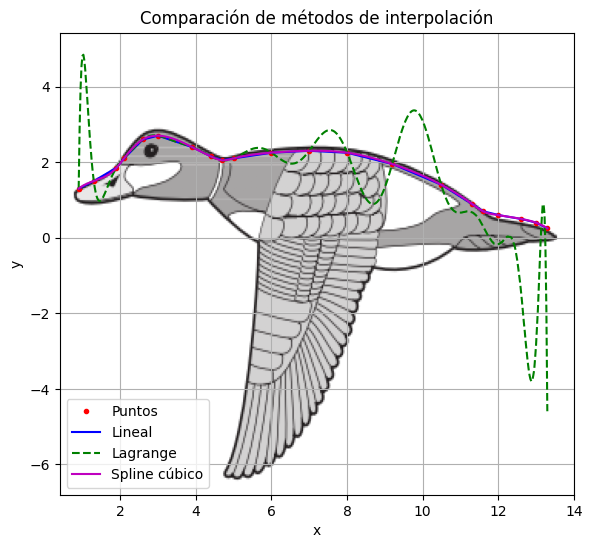

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos')
plt.plot(x_lineal, y_lineal, 'b-', label='Lineal')
plt.plot(x_lagrange, y_lagrange, 'g--', label='Lagrange')
plt.plot(x_spline, y_spline, 'm-', label='Spline cúbico')
plt.title('Comparación de métodos de interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

**Conclusión:**

•	Lagrange puede presentar oscilaciones (fenómeno de Runge), especialmente si los puntos no están bien distribuidos o son muchos.

•	Interpolación lineal es estable pero no suave.

•	Splines cúbicos proporcionan una aproximación suave y visualmente más natural.

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

Spline evaluado en x = 1.5: 3.4500
S_0(x) = 0.4667(x - -1)^3 + 0.0000(x - -1)^2 + -2.4667(x - -1) + 5.0000
S_1(x) = -0.3333(x - 0)^3 + 1.4000(x - 0)^2 + -1.0667(x - 0) + 3.0000
S_2(x) = -0.1333(x - 1)^3 + 0.4000(x - 1)^2 + 0.7333(x - 1) + 3.0000


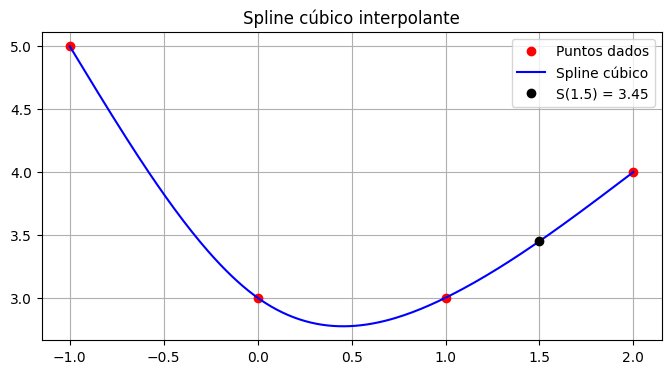

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Datos
x = np.array([-1, 0, 1, 2])
y = np.array([5, 3, 3, 4])

# Construir spline cúbico natural
cs = CubicSpline(x, y, bc_type='natural')

# Evaluar en x = 1.5
x_eval = 1.5
y_eval = cs(x_eval)
print(f"Spline evaluado en x = {x_eval}: {y_eval:.4f}")

# Mostrar los coeficientes del spline
for i in range(len(cs.c[0])):
    a = cs.c[0][i]  # coeficiente cúbico
    b = cs.c[1][i]  # coeficiente cuadrático
    c = cs.c[2][i]  # coeficiente lineal
    d = cs.c[3][i]  # coeficiente constante
    print(f"S_{i}(x) = {a:.4f}(x - {x[i]})^3 + {b:.4f}(x - {x[i]})^2 + {c:.4f}(x - {x[i]}) + {d:.4f}")

# Graficar
x_dense = np.linspace(-1, 2, 200)
y_dense = cs(x_dense)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'or', label='Puntos dados')
plt.plot(x_dense, y_dense, 'b-', label='Spline cúbico')
plt.plot(x_eval, y_eval, 'ko', label=f'S({x_eval}) = {y_eval:.2f}')
plt.grid()
plt.legend()
plt.title('Spline cúbico interpolante')
plt.show()

In [ ]:
import sympy as sp

# Variables simbólicas
x = sp.Symbol('x')
h = 1  # Como los puntos están separados por 1 unidad

# Puntos
xi = [-1, 0, 1, 2]
yi = [5, 3, 3, 4]

# Derivadas segundas incógnitas
M0, M1, M2, M3 = sp.symbols('M0 M1 M2 M3')

# Sistema matricial para spline natural
# Ecuaciones del sistema lineal
eq1 = M0  # Condición natural: M0=0
eq2 = h*M0 + 4*h*M1 + h*M2 - 6*((yi[2] - yi[1])/h - (yi[1] - yi[0])/h)
eq3 = h*M1 + 4*h*M2 + h*M3 - 6*((yi[3] - yi[2])/h - (yi[2] - yi[1])/h)
eq4 = M3  # Condición natural: M3=0

# Resolver el sistema para las segundas derivadas
sol = sp.solve([eq1, eq2, eq3, eq4], (M0, M1, M2, M3))
M0_val, M1_val, M2_val, M3_val = sol[M0], sol[M1], sol[M2], sol[M3]

print("Solución de las segundas derivadas:")
print(f"M0 = {M0_val}, M1 = {M1_val}, M2 = {M2_val}, M3 = {M3_val}")

def spline_segment(xi, yi, Mi, Mi1):
    """
    Calcula el polinomio cúbico del segmento del spline para el intervalo [x0, x1].

    Parámetros de entrada:
    - xi: lista o tupla con dos valores, los extremos del intervalo [x0, x1].
    - yi: lista o tupla con dos valores, las ordenadas correspondientes [y0, y1].
    - Mi: segunda derivada en el nodo izquierdo (x0).
    - Mi1: segunda derivada en el nodo derecho (x1).

    Retorna:
    - polinomio_spline: expresión simbólica del polinomio cúbico para el segmento.
    """
    hi = xi[1] - xi[0]  # Longitud del intervalo
    x0 = xi[0]
    x1 = xi[1]

    term1 = Mi * (x1 - x)**3 / (6 * hi)
    term2 = Mi1 * (x - x0)**3 / (6 * hi)
    term3 = (yi[0] - Mi * (hi**2) / 6) * (x1 - x) / hi
    term4 = (yi[1] - Mi1 * (hi**2) / 6) * (x - x0) / hi

    return sp.simplify(term1 + term2 + term3 + term4)

# Polinomios del spline por intervalos
S0 = spline_segment([xi[0], xi[1]], [yi[0], yi[1]], M0_val, M1_val)
S1 = spline_segment([xi[1], xi[2]], [yi[1], yi[2]], M1_val, M2_val)
S2 = spline_segment([xi[2], xi[3]], [yi[2], yi[3]], M2_val, M3_val)

print("\nPolinomios del spline:")
print("S0(x):", S0)
print("S1(x):", S1)
print("S2(x):", S2)

# Evaluar el spline S2 en x = 1.5
x_val = 1.5
S2_val = S2.subs(x, x_val)
print(f"\nEvaluación del spline en x = {x_val}: S2({x_val}) = {S2_val.evalf():.4f}")

Solución de las segundas derivadas:
M0 = 0.0, M1 = 2.80000000000000, M2 = 0.800000000000000, M3 = 0.0

Polinomios del spline:
S0(x): -2.46666666666667*x + 0.466666666666667*(x + 1)**3 + 2.53333333333333
S1(x): -0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3.0
S2(x): 1.13333333333333*x - 0.133333333333333*(x - 2)**3 + 1.73333333333333

Evaluación del spline en x = 1.5: S2(1.5) = 3.4500
